# ADS-500B Final Project - E-Commerce Data Set

## Mauricio Espinoza, Archana Patil, Nolan Peters

### Overview

As a data science firm specializing in e-commerce, we are tasked with improving ACME's e-commerce presence and to predict purchase behavior on their website. ACME is a legacy brand with a strong brick and mortar history, looking to improve their success in the online space. The business currently faces three primary challenges: limited technology resources, inventory management, and difficulty attracting new customers. To address these concerns, our team will develop a model utilizing user session data to predict purchase behavior during a session. 

# Data Importing and Pre-processing

First we will import the libraries need for pre-processing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve

Next, let's load the dataset and review its structure and attributes. 

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12202.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12207.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503770,34.472398,31.731468,1194.746220,0.022191,0.043073,5.911196,0.061427,2.123618,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270882,140.749294,44.475503,1913.669288,0.048488,0.048597,18.632116,0.198917,0.911829,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Now, let's view missing values, and impute values accordingly. 

In [6]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

Let's get an understanding of the missing values for the 'Informational' variable.

In [7]:
# check number of na values in the information column, but that have data in the durtation column.
df.loc[df['Informational'].isna() & df['Informational_Duration'] != 0, ['Informational', 'Informational_Duration']]

,Informational,Informational_Duration
641,NaN,77.000000
698,NaN,75.250000
891,NaN,47.000000
921,NaN,44.500000
1904,NaN,250.666667
3863,NaN,500.000000
4670,NaN,236.000000
4724,NaN,89.000000
5242,NaN,18.000000
5370,NaN,8.000000


These 24 values contain information in the 'Informational_Duration' column which suggests that the data is missing from the 'Informational' column for these observations. Let's replace these values with the mode of non-zero 'Informational_Duration' observations. 

In [8]:
informational_non_zero = df.loc[df['Informational_Duration'] != 0, ['Informational']].mode().iloc[0]
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] != 0), ['Informational']] = df.loc[df['Informational_Duration'] != 0, ['Informational']].fillna(informational_non_zero) 

In [9]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational              104
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

There are 104 remaining null responses, let's verify that all 'Informational_Duration' counts for these observations are 0

In [10]:
# check the count of na values that are 0 in the 'Informational_Duration' column
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] == 0), ['Informational', 'Informational_Duration']].count()

Informational               0
Informational_Duration    104
dtype: int64

The counts are the same so we will replace these values with 0 since their 'Information_Duration' count is all 0.

In [11]:
df['Informational'] = df['Informational'].fillna(0) 

Now we will look at 'PageValues'.

In [12]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

'PageValues' is a bit abstract with the information we have available. We will check the distribution and if warranted, use the mean to impute missing values. 

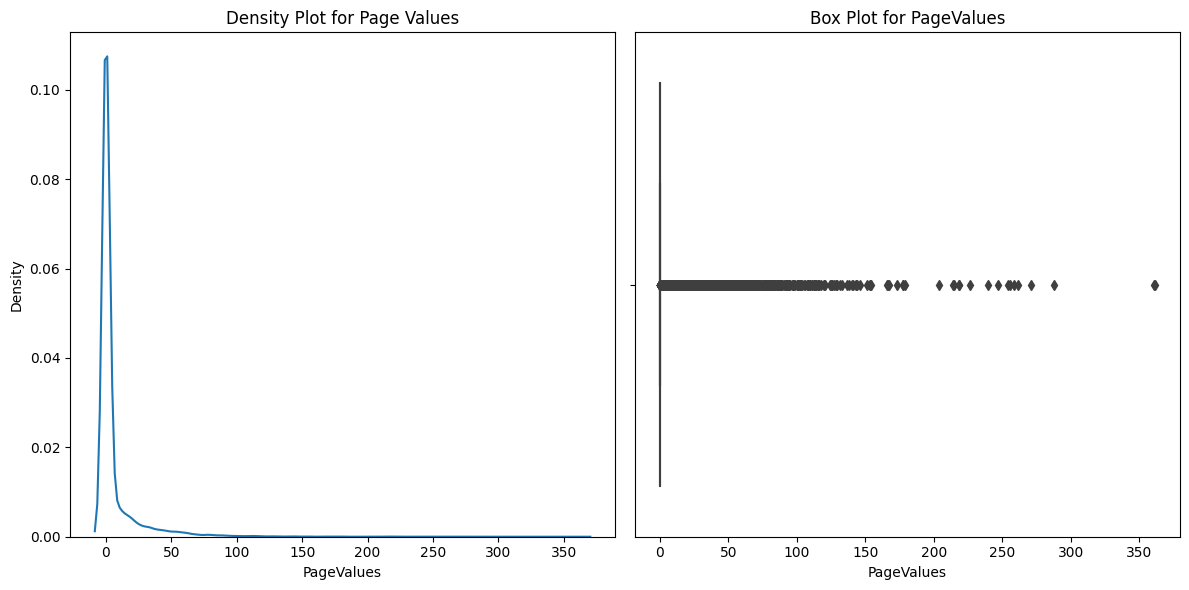

In [13]:
# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first Seaborn plot on the first subplot
sns.kdeplot(data=df, x='PageValues', ax=ax[0])
ax[0].set_title('Density Plot for Page Values')

# Plot the second Seaborn plot on the second subplot
sns.boxplot(data=df, x='PageValues', ax=ax[1])
ax[1].set_title('Box Plot for PageValues')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

The distribution is skewed heavily to the right some large outliers. Let's fill the remaining values with the mode instead. 

In [14]:
df['PageValues'] = df['PageValues'].fillna(df['PageValues'].mode().iloc[0]) 

In [15]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

Finally, as a categorical variables, we will impute the remaining operating systems with the mode.

In [16]:
df['OperatingSystems'] = df['OperatingSystems'].fillna(df['OperatingSystems'].mode().iloc[0]) 

Now, we will ensure we have the proper data types for our variables and make the necessary changes. 

In [17]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [18]:
# change categorical variables to category type (including month given it lacks a high level of granularity)
cat_var = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']

for i in cat_var: 
    df[i] = df[i].astype('category')

In [19]:
# change 'Informational' to int64 for consistency
df['Informational'] = df['Informational'].astype('int64')

In [20]:
print(df.dtypes)

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object


Looks good, we can now move on to conduct further analysis. 

# Data Analysis and Visualization

### Data Transformation

We will now normalize the data for further analysis. The data below is normalized in order to improve interpretability using a scaler. The Min-Max Scaler normalizes data by linearly transforming feature values to a specified range, typically [0, 1], based on the minimum and maximum values of each feature. This process ensures a consistent scale across features, preventing those with larger scales from disproportionately influencing correlation calculations. Before observing correlation factors between variables, applying the Min-Max Scaler offers interpretability by standardizing correlation coefficients and improves the performance of certain machine learning algorithms sensitive to feature scales. The resulting normalized data facilitates clearer visualizations and aids in the understanding of linear relationships between variables.

In [21]:
df_normalized = df.copy()

# Select numeric columns for normalization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [22]:
print("Original DataFrame:")
print(df.head())

print("\nNormalized DataFrame:")
print(df_normalized.head())

Original DataFrame:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb              1.0   
1         0.00       0.10         0.0   

### Measures of Centrality

Let's make kernel density estimator plots for all float variables to visualize their distributions. For these visualizations we will use the clean data frame that has not been normalized. We will revisit the normalized data frame for our correlation analysis. 

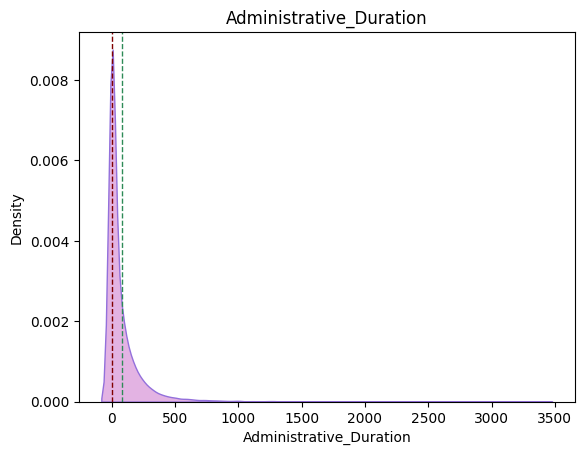

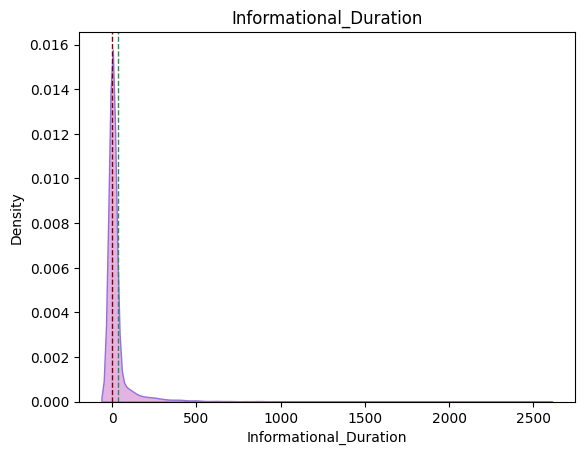

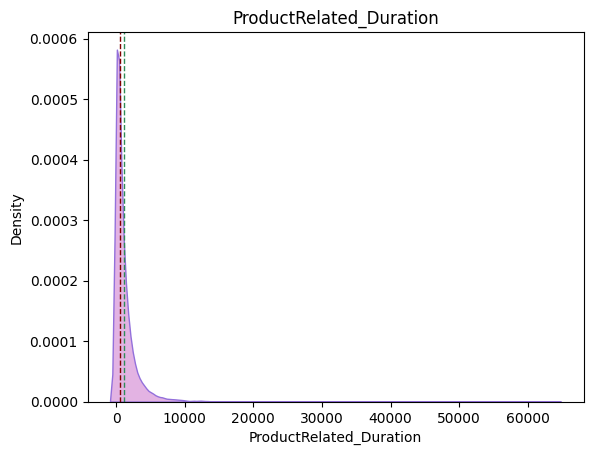

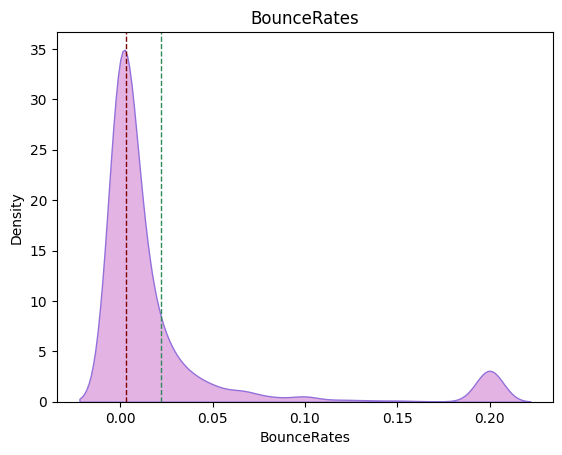

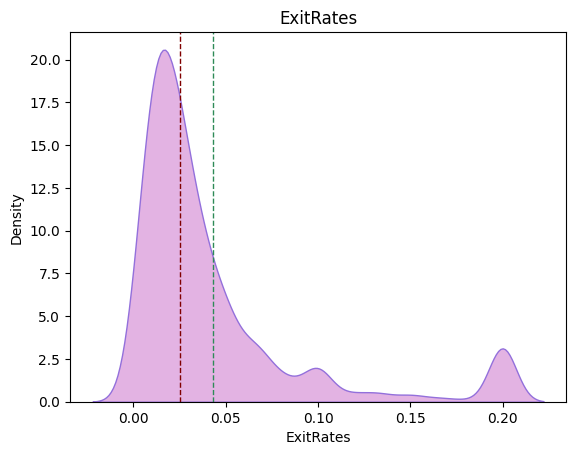

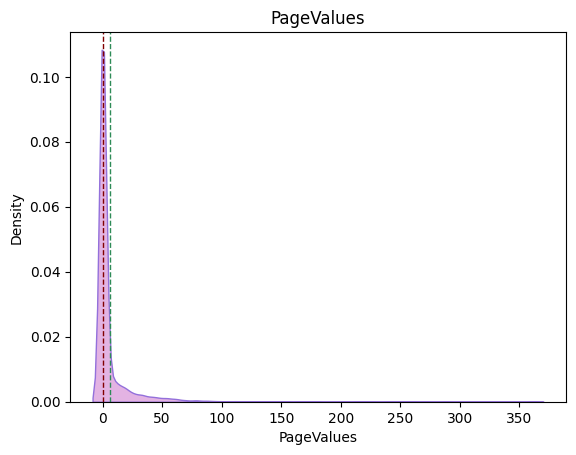

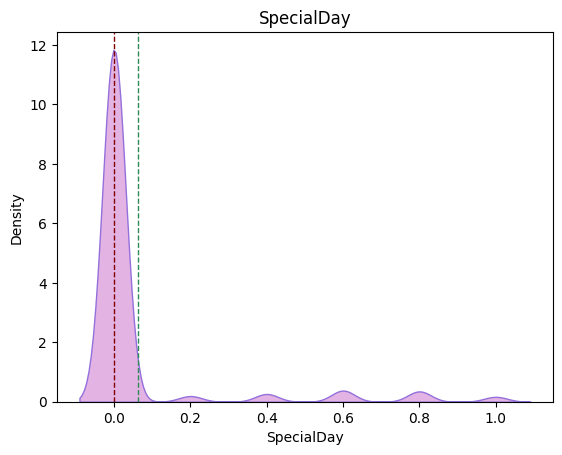

In [23]:
# For loop to iterate through float columns and return a kde plot.
for col in df.columns:
    if df[col].dtype == 'float64':
        sns.kdeplot(data=df, x=col, color='plum', ec='mediumpurple', fill=True, alpha=.8)
        plt.title(col)
        plt.axvline(x=df[col].mean(), color = 'seagreen', ls='--', lw=1)
        plt.axvline(x=df[col].median(), color = 'maroon', ls='--', lw=1)
        plt.show()

  Let's do the same for the 3 integer variables.

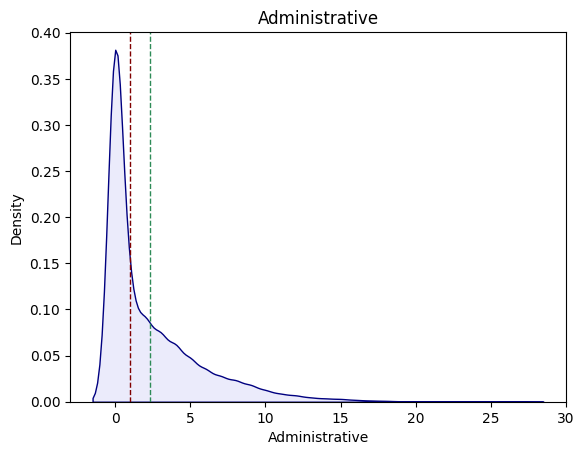

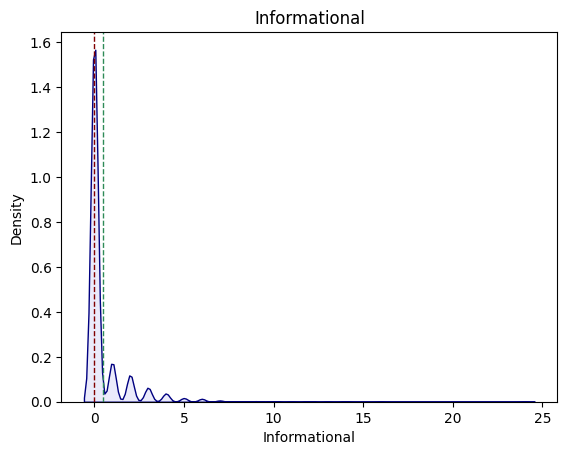

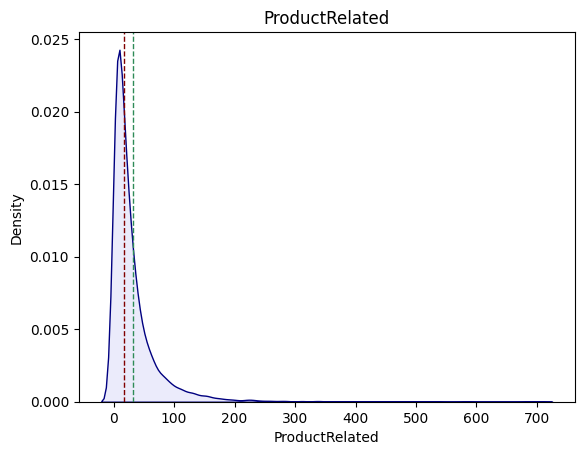

In [24]:
# For loop to iterate through integer columns and return a kde plot.
for col in df.columns:
    if df[col].dtype == 'int64':
        sns.kdeplot(data=df, x=col, color='lavender', ec='navy', fill=True, alpha=.8)
        plt.title(col)
        plt.axvline(x=df[col].mean(), color = 'seagreen', ls='--', lw=1)
        plt.axvline(x=df[col].median(), color = 'maroon', ls='--', lw=1)
        plt.show()

As discussed earlier, the distribution of all of our variables skew far to the right, pulled by outliers. We have decided to remove the outliers as defined by the IQR from the product related duration and administrative related duration (Tukey method).  We recognize that these outliers, due to its source and its nature as an E-commerce dataset, may be genuine. In the future, collaboration with field experts could help determine this. Informational duration's maximum is just over half an hour so we left this as is. 

Let's write a function to remove outliers from our dataset based on two arguments, the dataset and column. Then let's use a for loop to iterate through the columns we want to remove the outliers from. 

In [25]:
# Function to remove outliers based on the IQR (Tukey)
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25) # find lower quantile
    q3 = df[col].quantile(0.75) # find upper quantile
    iqr = q3 - q1 # define interquartile range
    lower_bound = q1 - 1.5 * iqr # set lower bound
    upper_bound = q3 + 1.5 * iqr # set upper bound
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # filter column 

In [26]:
# Set columns to remove outliers from 
col_fix = ['Administrative_Duration', 'ProductRelated_Duration']

# For loop to iterate through col_fix list and run function
for col in col_fix:
    df = remove_outliers(df, col)

Let's check the distributions again to see if they improved. 

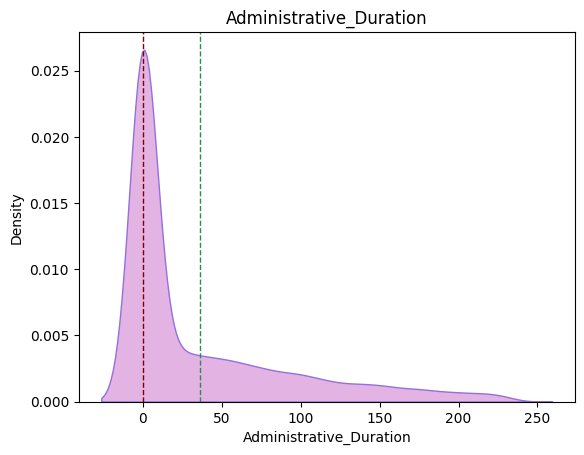

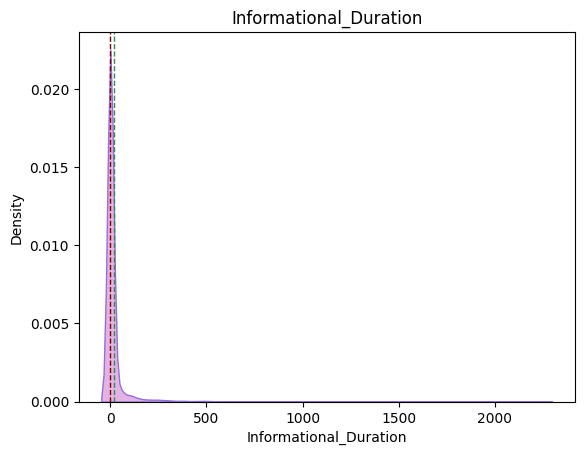

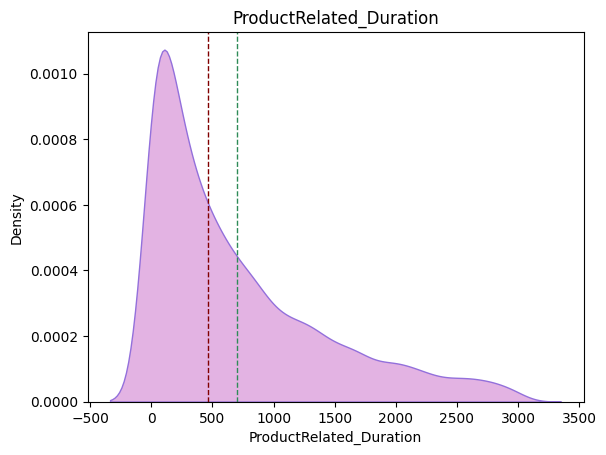

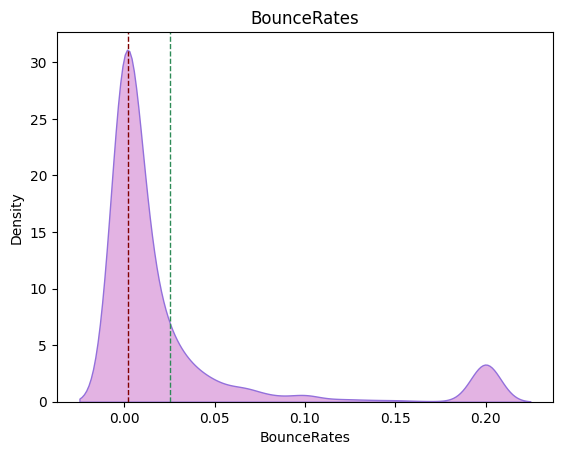

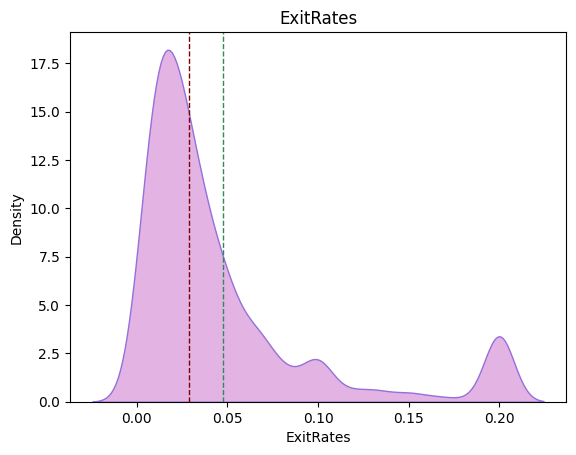

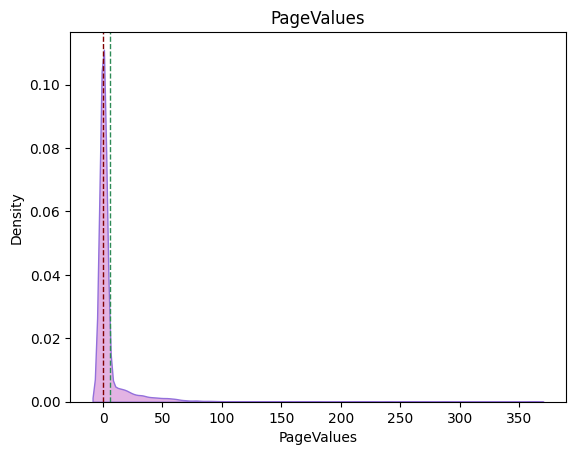

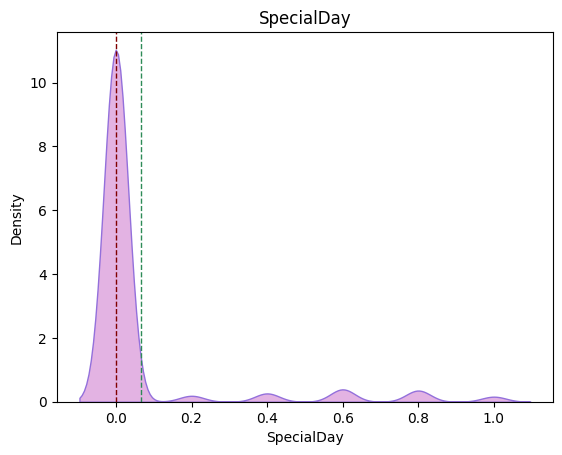

In [27]:
for col in df.columns:
    if df[col].dtype == 'float64':
        sns.kdeplot(data=df, x=col, color='plum', ec='mediumpurple', fill=True, alpha=.8)
        plt.title(col)
        plt.axvline(x=df[col].mean(), color = 'seagreen', ls='--', lw=1)
        plt.axvline(x=df[col].median(), color = 'maroon', ls='--', lw=1)
        plt.show()

While the the variables are still very much right skewed, we were able to remove the obvious outliers from our data.

Now, let's look at how the categories break down. 

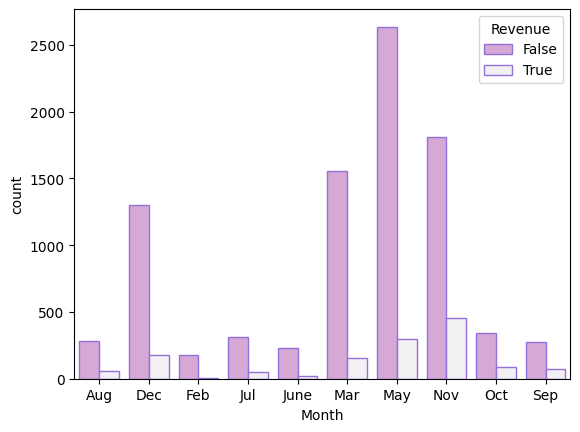

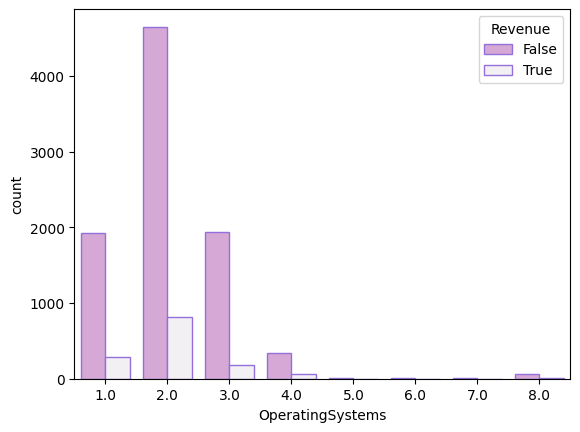

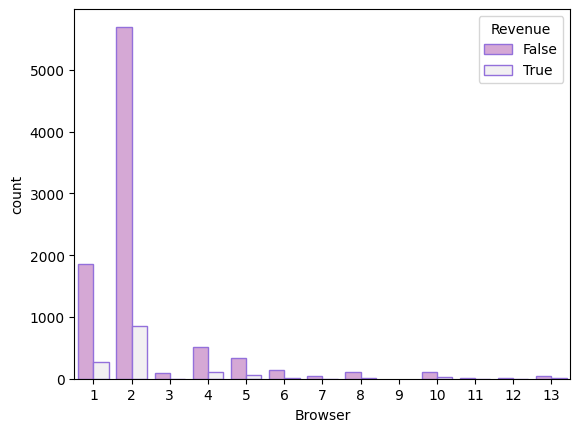

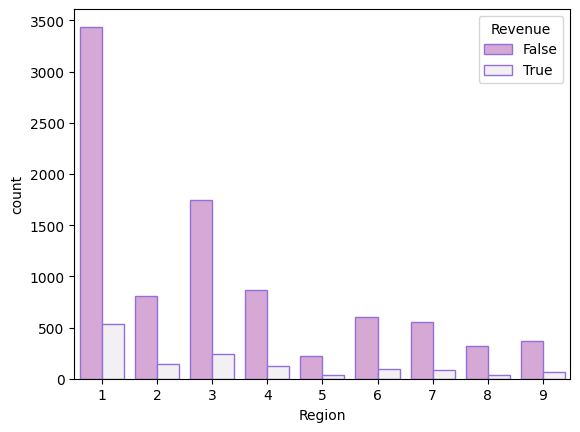

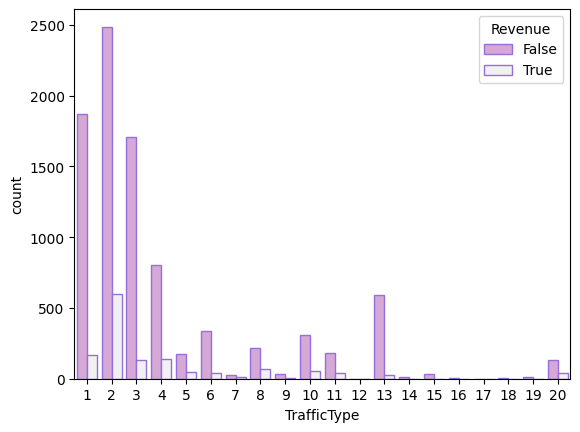

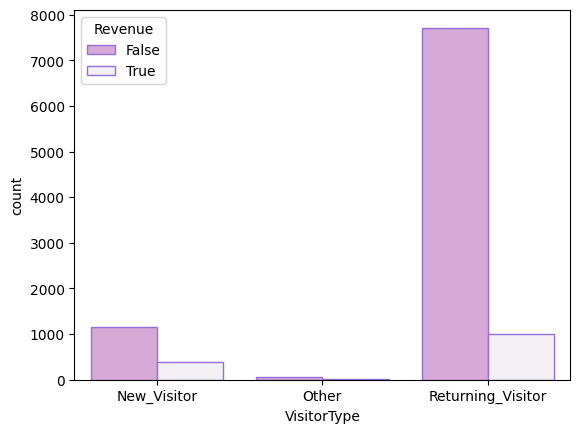

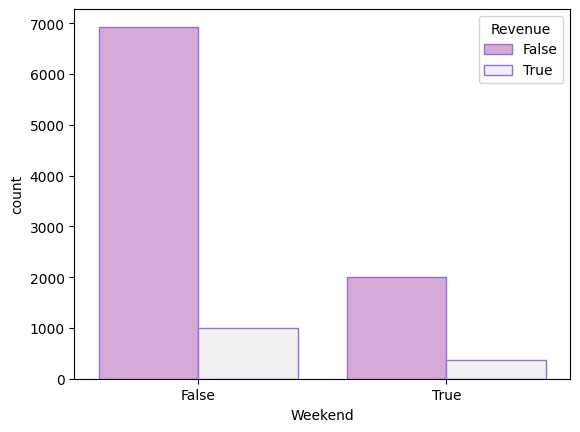

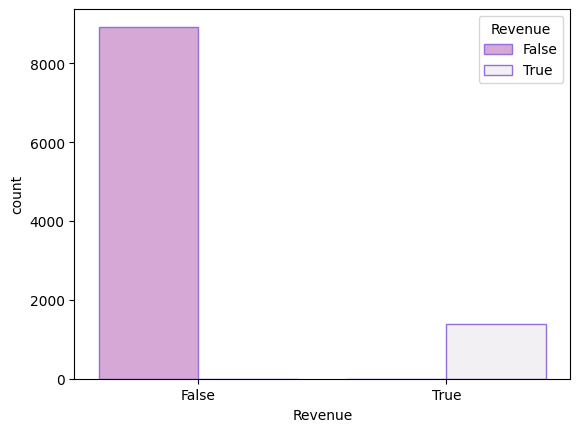

In [28]:
# For loop to vreate a countplot for all category variables in the dataset
for col in df.columns:
    if df[col].dtype == 'category' or df[col].dtype == 'bool':
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.countplot(data=df, x=col, hue='Revenue', palette="light:plum_r", ec='mediumpurple')
            plt.show()

These visualizations have yielded a few observations. A majority of our observations occurred in May, while the most purchases occurred in November. This is an interesting note that the month with total traffic and purchases are not the same. Further, November's sales could be driven by the occurrence of a Black Friday sale or holiday shopping. The most observations and purchases occurred on operating system 2, browser 2, and traffic type 2. With more information, we could determine which operating system and browser to optimize the site for. A few more interesting notes are that a majority of our observations are from returning users as well as the majority of the traffic to the site. This tells us that there is a huge opportunity for outreach to drive new users to the site. 

Next, let's see if there are any noticeable differences in the distribution of the time spent on a page, given that the user does use that page type, and weather or not the user made a purchase.  

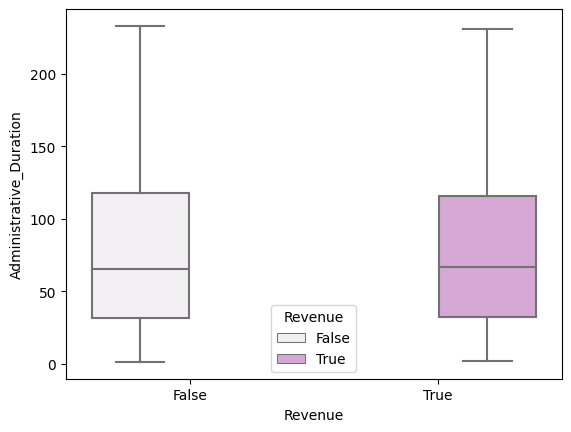

In [29]:
# Set a filter to exclude 0 from duration to improve visual of users that use page type
admin_page_time = df.loc[df['Administrative_Duration']>0,:]

sns.boxplot(data=admin_page_time, x='Revenue', y='Administrative_Duration', hue='Revenue', color='plum');

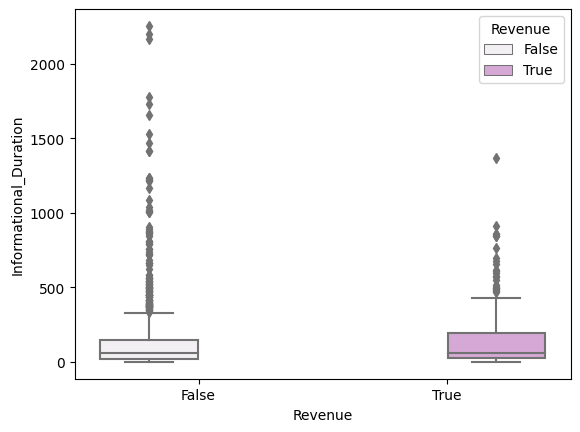

In [30]:
# Set a filter to exclude 0 from duration to improve visual of users that use page type
info_page_time = df.loc[df['Informational_Duration']>0,:]

sns.boxplot(data=info_page_time, x='Revenue', y='Informational_Duration', hue='Revenue', color='plum');

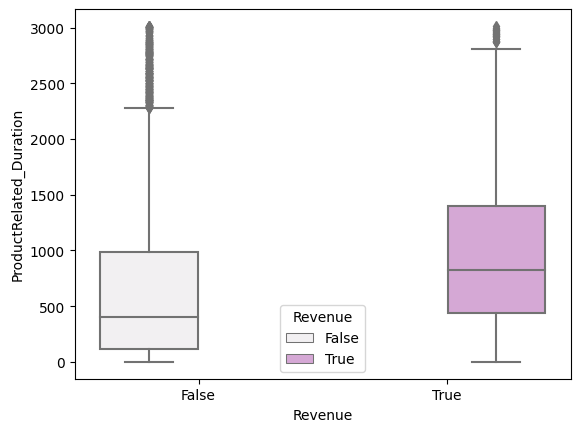

In [31]:
sns.boxplot(data=df, x='Revenue', y='ProductRelated_Duration', hue='Revenue', color='plum')
plt.show() 

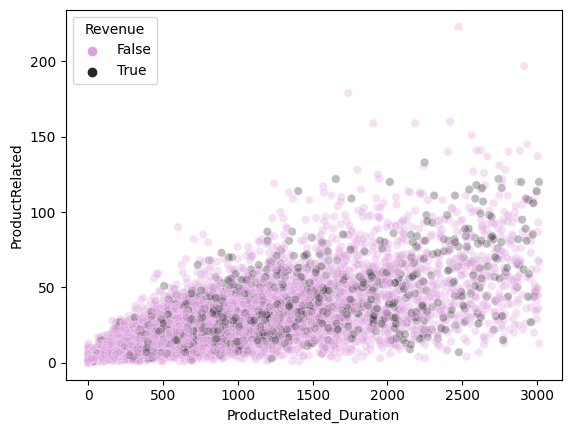

In [32]:
sns.scatterplot(data=df, x='ProductRelated_Duration', y='ProductRelated', hue='Revenue', palette='dark:plum_r', alpha=.3)
plt.show()

From the analysis of the box plots, it appears that the median and distribution of the product related duration is higher for that of users who did make a purchase. This suggests that there may be a relationship between time spent on the product page and the user's willingness to make a purchase. This will be an important consideration moving forward in the model development process. However, this relationship is not immediately apparent in the scatterplot. The time spent on the other page types is relatively evenly distributed suggesting no relationship between purchases and time spent on those pages. 

### Correlation Overview

In [33]:
#create a dataframe that uses only numeric data 
df_numeric = pd.DataFrame()
df_numeric = df_normalized.select_dtypes(include='number')

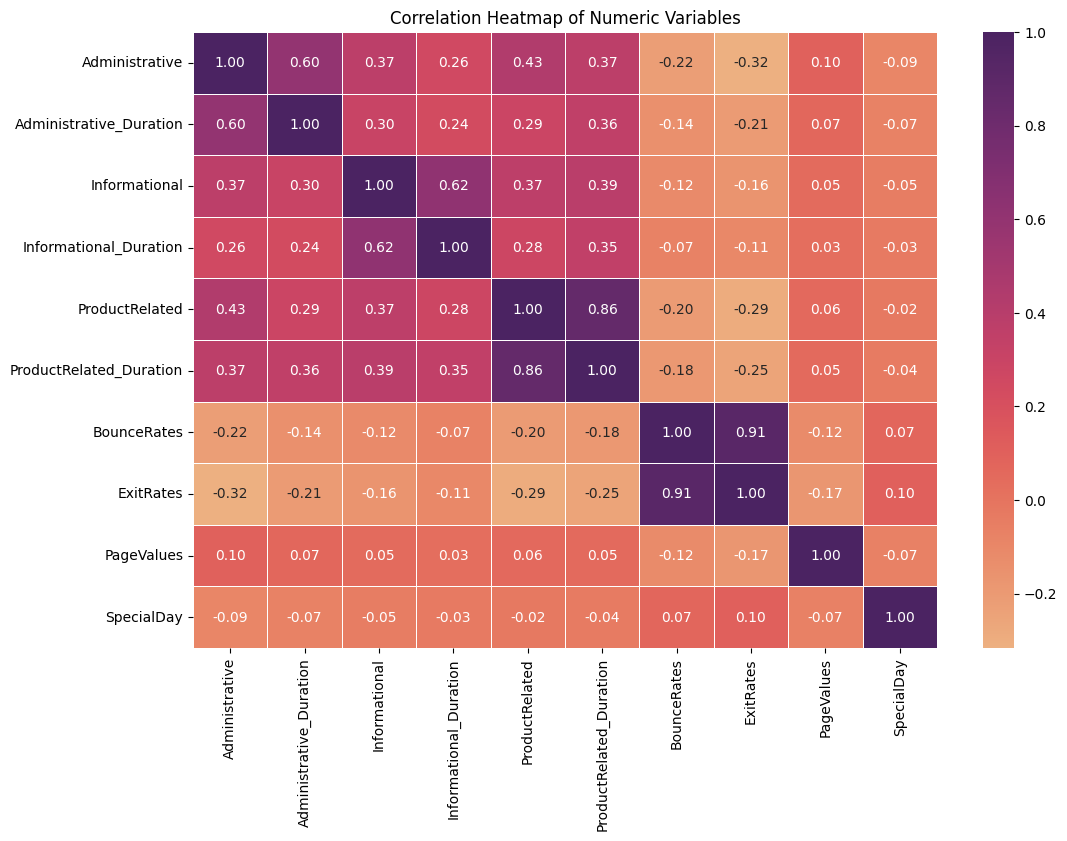

In [34]:
correlation_matrix = df_numeric.corr()

# correlation heat map 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

The correlation heat map from out data reveals that the strongest relationships between variables were Exit Rate & Bounce Rate (0.91), Product Related Duration & Product Related (0.86), Administrative & administrative Duration (0.6), Informational Duration & Informational (0.62), and Product Related & Administrative (0.43). Exit rate & Bounce rate having a high correlation is to be expected because bounces are only recorded if a user exits directly from the page they entered while exit rates are recorded regardless of a user’s prior activity on your website. Therefore, all bounces are exits but not all exits are bounces which would cause a great amount of correlation. Similarly, we would expect that a high number of visits to a page would correlate with spending more time on that page. Product Related & administrative was one correlation that we could not really understand why they'd be moderately correlated, however 0.43 is on the lower end of moderate correlations. Another big surprise was that Special Days (holidays) exhibited an very weak correlation to any of the other variables. One might assume that holidays might bright about a higher level of page visits on product related pages, however, the data did not show this to be the case. 

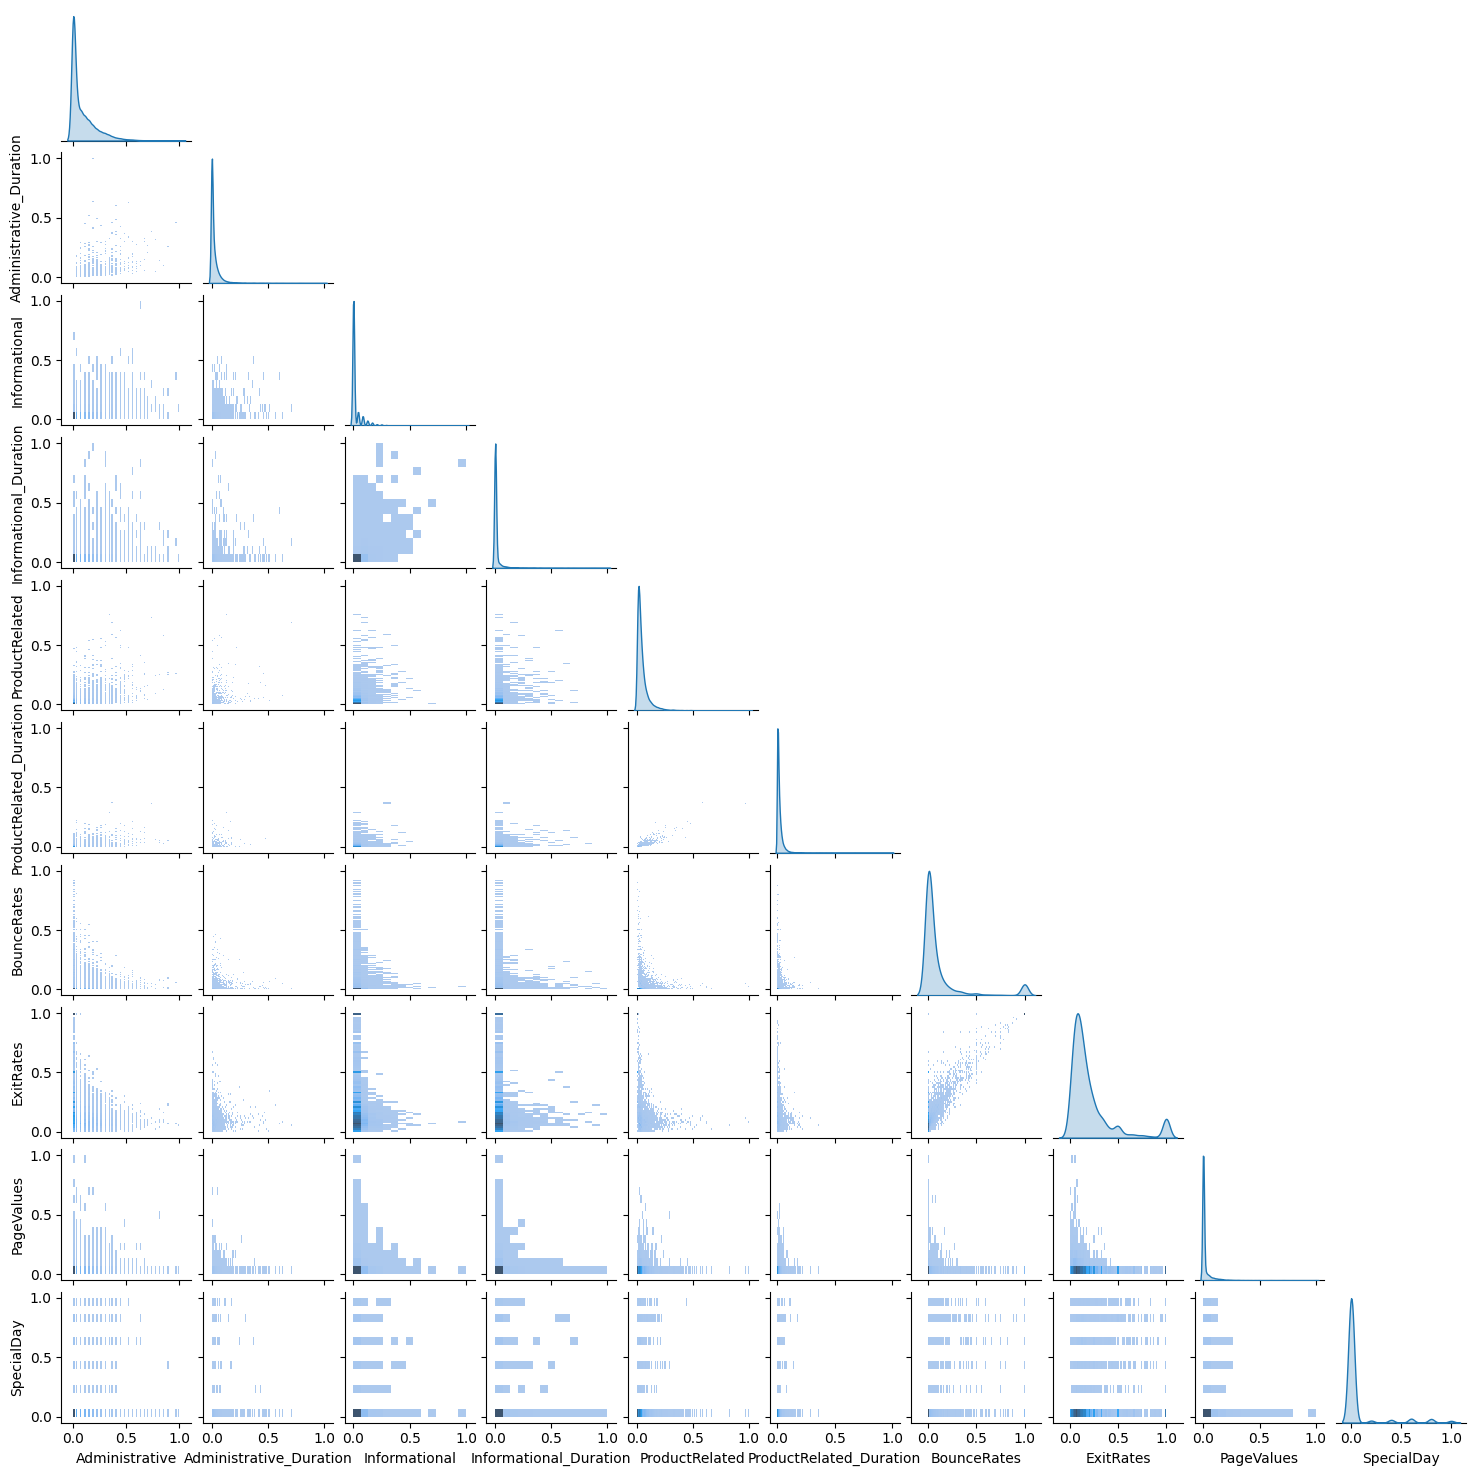

In [35]:
sns.pairplot(df_numeric, kind='hist', diag_kind='kde', height=1.5, corner=True);

# Logistic Regression Model

First, we will remove the categorical variables deemed extraneous for our model goals. 

In [36]:
# Dropping the categorical variables we will not be using in our model
model_df = df.drop(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis=1)

Now, we will recode the categorical variables used in the model to prepare for their inclusion in a logistic regression model. 

In [37]:
# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse=True)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(model_df[['VisitorType', 'Weekend', 'Revenue']])

# Convert the sparse matrix to a DataFrame and concatenate with the original DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['VisitorType', 'Weekend', 'Revenue']))

# Chage data type to integers
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Reset the indecies and combine the encoded dataframe with the original
df_encoded = pd.concat([model_df.reset_index(drop=True), one_hot_encoded_df.reset_index(drop=True)], axis=1)

# Drop non coded variables
df_encoded.drop(['VisitorType', 'Weekend', 'Revenue'], axis=1, inplace=True)

In [38]:
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,1,1,0


In [39]:
# Rename encoded columns and drop extra
df_encoded['Revenue'] = df_encoded['Revenue_True']
df_encoded['Weekend'] = df_encoded['Weekend_True']
df_encoded.drop(['Revenue_True', 'Weekend_True'], axis=1, inplace=True)

In [40]:
print(df.shape, df_encoded.shape)

(10309, 18) (10309, 14)


Now that we have prepared the data accordingly, we will now define the features of the model and the target variable as well as split the data into a train and test groups. 

In [41]:
# Splitting the dataset into training and testing sets (80-20 split)
X = df_encoded.drop('Revenue', axis=1)  # Features
y = df_encoded['Revenue']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Displaying the shapes of the train and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((8247, 13), (2062, 13), (8247,), (2062,))

The dataset was split into training and testing sets with an 80-20 split. The training set has 8,247 samples, and the test set has 2,062 samples.

In [43]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# Predict on the test set
y_pred = logreg_model.predict(X_test)

In [46]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix

(0.906886517943744,
 0.7532467532467533,
 0.42962962962962964,
 0.5471698113207547,
 array([[1754,   38],
        [ 154,  116]]))

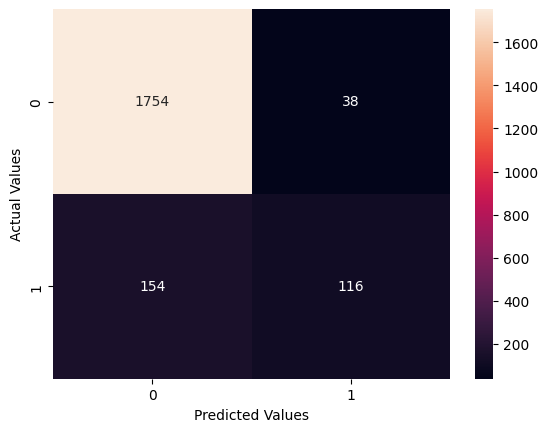

In [47]:
s = sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='d')
s.set(xlabel='Predicted Values', ylabel='Actual Values');

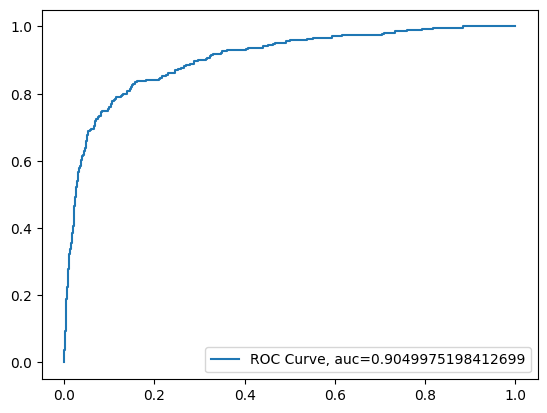

In [48]:
y_pred_proba = logreg_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The model is initialized using LogisticRegression from scikit-learn with max_iter=1000 and random_state=42.

We were able to determine the following evaluation metrics for this logisitic regression model:

After training and predictions, various metrics are calculated:
Accuracy: 90.69%
Precision: 75.32%
Recall: 42.96%
F1 Score: 54.72%

Accuracy: This measures how often the classifier correctly predicts. It's the ratio of correctly predicted observations (both true positives and true negatives) to the total observations. A high accuracy rate of 90.69% suggests that the model is performing well overall.

Precision: Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positives (true positives and false positives). A precision of 75.32% indicates that when the model predicts a positive class, it is correct about 75.32% of the time.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations (true positives) to all observations in the actual class. A recall of 42.96% indicates that the model correctly identifies 41.85% of all actual positive cases. This is lower than we are looking for to determine if the user will make a purchase on the site. Ideally, we are able to bring this number up above 50% to provide ACME with an actionable model however depending on how this will be implemented, we may prefer to be sensitive to recall. 

F1 Score: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. An F1 score of 54.72% is a measure of the model's accuracy, considering both precision and recall.

Confusion Matrix:
True Negative (TN): 1757
False Positive (FP): 38
False Negative (FN): 154
True Positive (TP): 116

In [49]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf

(0.9165858389912707,
 0.7289719626168224,
 0.5777777777777777,
 0.6446280991735536,
 array([[1734,   58],
        [ 114,  156]]))

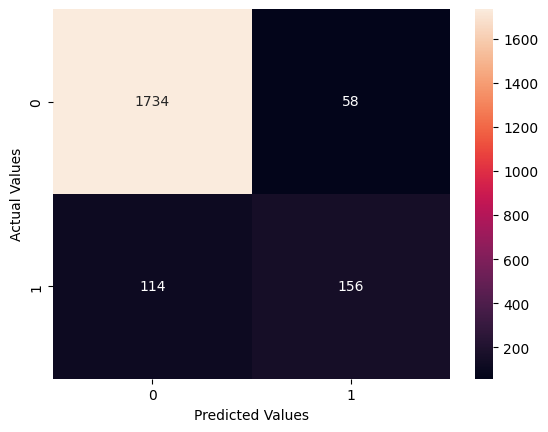

In [52]:
s1 = sns.heatmap(pd.DataFrame(conf_matrix_rf), annot=True, fmt='d');
s1.set(xlabel='Predicted Values', ylabel='Actual Values');

In [53]:
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(12)

,Feature,Importance
8,PageValues,0.443681
5,ProductRelated_Duration,0.114119
7,ExitRates,0.111016
4,ProductRelated,0.080550
1,Administrative_Duration,0.067944
6,BounceRates,0.063950
0,Administrative,0.044120
3,Informational_Duration,0.025325
2,Informational,0.016745
11,VisitorType_Returning_Visitor,0.013099


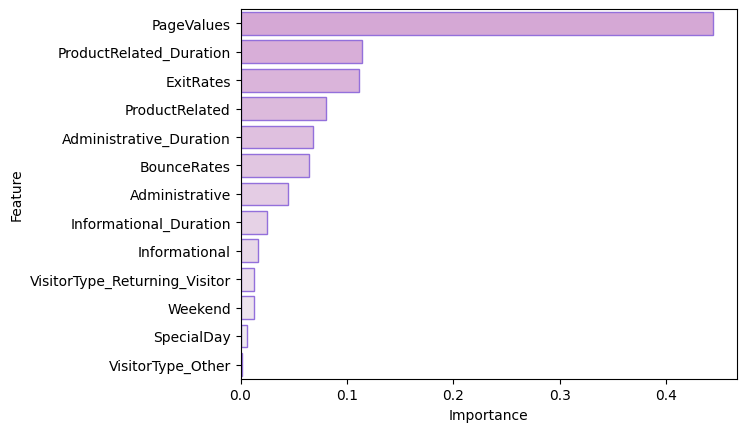

In [54]:
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette="light:plum_r", ec='mediumpurple');

Implementation of Random Forest Model:

The model is initialized using Random Forest Classifier from scikit-learn with random_state=42.
The model is then fitted to the training data.

Evaluation Metrics: 
Accuracy: 91.66%
Precision: 72.89%
Recall: 57.77%
F1 Score: 64.47%

Confusion Matrix:
True Negative (TN): 1734
False Positive (FP): 58
False Negative (FN): 114
True Positive (TP): 156

Page Values (Importance: 44.37%): Represents the average value for a web page that a user visited before completing an e-commerce transaction. Implications: High values indicate pages that are effective at contributing to conversions. Analyzing which pages have higher values can guide content and layout strategies.

Product Related Duration (Importance: 11.41%): Total time spent on pages related to products. Implications: Longer durations suggest greater engagement with product content. Insights into which products or types of pages retain attention can inform product placement and promotional strategies.

Exit Rates (Importance: 11.10%): The rate at which visitors exit the site from a particular page. Implications: Higher rates may indicate pages that are not engaging or relevant. Optimizing these pages can reduce bounce rates and improve user experience and potentially improve conversions.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=732038b7-a77f-4825-87cb-f80df92f72be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>